In [13]:
import numpy as np
import pandas as pd
#import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#Import and parse the data into a manipulatable dataset aka df or dataframe
xl = pd.ExcelFile("C:/Users/culle/Documents/Data/LAICPMS_Data/Kortyna_TO_30DISC_2Sig_Core_Rim_Jupyter.xlsx")
#xl = pd.ExcelFile("C:/Users/culle/Documents/Data/LAICPMS_Data/Kortyna_STX_UVD_30DISC_2Sig_Core_Rim_Jupyter.xlsx")
df = xl.parse("ZrUPb")#, index_col=1) #index_col=0 selects which column to index the rows based on
#df.set_index("Formation", inplace = True) #does same thing as index_col=0 above - sets the index column for the df; inplace = True makes it permananet

#Perform any of below functions to see what's in the dataframe
#df.columns #shows column headers
df[:10] #lists first 10 rows

,Unnamed: 0,Sample_ID,Formation,Age,Grain_ID,Analysis_ID,U_ppm,U_Th,BestAge_Rim,BestAge_err_Rim,...,RimCore,Sample_ID.1,Grain_ID.1,Analysis_ID.1,U_ppm.1,U_Th.1,BestAge_Core,BestAge_err_Core,Disc.1,RimCore.1
0,NaN,16TO-02,Javelina,Maastrichtian,16To_02_53.FIN2,16To_02_53.FIN2,385.0,1.871,100.1,3.9,...,Rim,16TO-02,16To_02_53.FIN2,16To_02_53.FIN2,245.6,1.871,117.9,2.7,1.995012,Core
1,NaN,16TO-03,Lower Black Peaks,Paleocene,16TO-03_70.FIN2,16TO-03_70.FIN2,87.5,3.960,103.3,5.3,...,Rim,16TO-03,16TO-03_70.FIN2,16TO-03_70.FIN2,141.8,2.164,166.9,4.4,3.024691,Core
2,NaN,16TO-04,Lower Black Peaks,Paleocene,16To_04_39.FIN2,16To_04_39.FIN2,385.0,2.059,397.0,14.0,...,Rim,16TO-04,16To_04_39.FIN2,16To_04_39.FIN2,46.1,2.938,950.0,88.0,0.315789,Core
3,NaN,16TO-04,Lower Black Peaks,Paleocene,16To_04_97.FIN2,16To_04_97.FIN2,317.0,1.933,86.8,1.8,...,Rim,16TO-04,16To_04_97.FIN2,16To_04_97.FIN2,250.8,2.382,162.2,6.6,4.023669,Core
4,NaN,16TO-04,Lower Black Peaks,Paleocene,16To_04_99.FIN2,16To_04_99.FIN2,443.0,1.164,181.7,3.5,...,Rim,16TO-04,16To_04_99.FIN2,16To_04_99.FIN2,100.6,0.686,1389.0,60.0,6.623470,Core
5,NaN,16TO-04,Lower Black Peaks,Paleocene,16To_04_135.FIN2,16To_04_135.FIN2,164.0,1.810,85.6,6.0,...,Rim,16TO-04,16To_04_135.FIN2,16To_04_135.FIN2,113.2,2.372,1241.0,42.0,18.694601,Core
6,NaN,16TO-05,Upper Black Peaks,Paleocene,16To_05_63.FIN2,16To_05_63.FIN2,1590.0,6.200,246.4,6.5,...,Rim,16TO-05,16To_05_63.FIN2,16To_05_63.FIN2,240.0,1.810,1568.0,32.0,1.721939,Core
7,NaN,16TO-06,Upper Black Peaks,Paleocene,16To_06_18.FIN2,16To_06_18.FIN2,542.0,46.000,435.0,22.0,...,Rim,16TO-06,16To_06_18.FIN2,16To_06_18.FIN2,60.3,1.546,1033.0,47.0,3.872217,Core
8,NaN,16TO-06,Upper Black Peaks,Paleocene,16To_06_20.FIN2,16To_06_20.FIN2,136.4,1.075,90.7,2.9,...,Rim,16TO-06,16To_06_20.FIN2,16To_06_20.FIN2,304.0,0.897,1430.0,46.0,22.587413,Core
9,NaN,16TO-06,Upper Black Peaks,Paleocene,16To_06_34.FIN2,16To_06_34.FIN2,563.0,3.295,969.0,31.0,...,Rim,16TO-06,16To_06_34.FIN2,16To_06_34.FIN2,248.5,1.364,1188.0,32.0,4.040404,Core


In [15]:
#Couldn't get around this.. needed to set the index to "Formation" for the df.loc func to work, but for some reason the for i in range len(sampleList): for loop then can't find it..
df2 = xl.parse("ZrUPb")#, index_col=1) #index_col=0 selects which column to index the rows based on
df2.set_index("Age", inplace = True) #does same thing as index_col=0 above - sets the index column for the df; inplace = True makes it permananet

df2[:10]

,Unnamed: 0,Sample_ID,Formation,Grain_ID,Analysis_ID,U_ppm,U_Th,BestAge_Rim,BestAge_err_Rim,Disc,RimCore,Sample_ID.1,Grain_ID.1,Analysis_ID.1,U_ppm.1,U_Th.1,BestAge_Core,BestAge_err_Core,Disc.1,RimCore.1
Age,,,,,,,,,,,,,,,,,,,,
Maastrichtian,NaN,16TO-02,Javelina,16To_02_53.FIN2,16To_02_53.FIN2,385.0,1.871,100.1,3.9,2.142857,Rim,16TO-02,16To_02_53.FIN2,16To_02_53.FIN2,245.6,1.871,117.9,2.7,1.995012,Core
Paleocene,NaN,16TO-03,Lower Black Peaks,16TO-03_70.FIN2,16TO-03_70.FIN2,87.5,3.960,103.3,5.3,3.457944,Rim,16TO-03,16TO-03_70.FIN2,16TO-03_70.FIN2,141.8,2.164,166.9,4.4,3.024691,Core
Paleocene,NaN,16TO-04,Lower Black Peaks,16To_04_39.FIN2,16To_04_39.FIN2,385.0,2.059,397.0,14.0,1.732673,Rim,16TO-04,16To_04_39.FIN2,16To_04_39.FIN2,46.1,2.938,950.0,88.0,0.315789,Core
Paleocene,NaN,16TO-04,Lower Black Peaks,16To_04_97.FIN2,16To_04_97.FIN2,317.0,1.933,86.8,1.8,1.809955,Rim,16TO-04,16To_04_97.FIN2,16To_04_97.FIN2,250.8,2.382,162.2,6.6,4.023669,Core
Paleocene,NaN,16TO-04,Lower Black Peaks,16To_04_99.FIN2,16To_04_99.FIN2,443.0,1.164,181.7,3.5,3.041622,Rim,16TO-04,16To_04_99.FIN2,16To_04_99.FIN2,100.6,0.686,1389.0,60.0,6.623470,Core
Paleocene,NaN,16TO-04,Lower Black Peaks,16To_04_135.FIN2,16To_04_135.FIN2,164.0,1.810,85.6,6.0,0.234192,Rim,16TO-04,16To_04_135.FIN2,16To_04_135.FIN2,113.2,2.372,1241.0,42.0,18.694601,Core
Paleocene,NaN,16TO-05,Upper Black Peaks,16To_05_63.FIN2,16To_05_63.FIN2,1590.0,6.200,246.4,6.5,0.203335,Rim,16TO-05,16To_05_63.FIN2,16To_05_63.FIN2,240.0,1.810,1568.0,32.0,1.721939,Core
Paleocene,NaN,16TO-06,Upper Black Peaks,16To_06_18.FIN2,16To_06_18.FIN2,542.0,46.000,435.0,22.0,0.911162,Rim,16TO-06,16To_06_18.FIN2,16To_06_18.FIN2,60.3,1.546,1033.0,47.0,3.872217,Core
Paleocene,NaN,16TO-06,Upper Black Peaks,16To_06_20.FIN2,16To_06_20.FIN2,136.4,1.075,90.7,2.9,2.834467,Rim,16TO-06,16To_06_20.FIN2,16To_06_20.FIN2,304.0,0.897,1430.0,46.0,22.587413,Core


In [16]:
#let's you see all the unique values in a specified column, useful to run if you don't know all the options in a column

#samples = np.unique(df['Sample_ID'])

samples = np.unique(df['Age'])
                 
samples

array(['Campanian', 'Eocene', 'Maastrichtian', 'Paleocene'], dtype=object)

In [17]:
sampleList = ['Campanian', 'Maastrichtian', 'Paleocene', 'Eocene']

sampleList1 = ['Campanian', 'Maastrichtian']

sampleList2 = ['Paleocene','Eocene']

#sampleList = ['Maastrichtian', 'Late Paleocene', 'Early Eocene', 'Mid Eocene', 'Late Eocene', 'Early Oligocene']

#sampleList = ['Early Oligocene']

#sampleList = ['Early Oligocene', 'Late Eocene', 'Mid Eocene', 'Early Eocene', 'Late Paleocene', 'Maastrichtian']

#sampleList = ['Goliad']

#sampleList = ['Jackson','Yegua','Laredo','El Pico Clay','Bigford','Carrizo','Indio','Kincaid','Escondido']

sampleList

['Campanian', 'Maastrichtian', 'Paleocene', 'Eocene']

In [18]:
#df2.set_index("Grain_ID", inplace = True)
x = []
y = []
X_error = []
Y_error = []

#for i in range(len(sampleList)): 
#    x.append(df.loc[df['Sample_ID']==sampleList[i]]['BestAge_Core'])
#    y.append(df.loc[df['Sample_ID']==sampleList[i]]['BestAge_Rim'])
#    X_error.append(df.loc[df['Sample_ID']==sampleList[i]]['BestAge_err_Core'])
#    Y_error.append(df.loc[df['Sample_ID']==sampleList[i]]['BestAge_err_Rim'])

#for i in range(len(sampleList)): 
#    x.append(df.loc[df['Formation']==sampleList[i]]['BestAge_Core'])
#    y.append(df.loc[df['Formation']==sampleList[i]]['BestAge_Rim'])
#    X_error.append(df.loc[df['Formation']==sampleList[i]]['BestAge_err_Core'])
#    Y_error.append(df.loc[df['Formation']==sampleList[i]]['BestAge_err_Rim'])

for i in range(len(sampleList)): 
    x.append(df.loc[df['Age']==sampleList[i]]['BestAge_Core'])
    y.append(df.loc[df['Age']==sampleList[i]]['BestAge_Rim'])
    X_error.append(df.loc[df['Age']==sampleList[i]]['BestAge_err_Core'])
    Y_error.append(df.loc[df['Age']==sampleList[i]]['BestAge_err_Rim'])

#    print (x, y)
#    print (x)
#    plt.plot(x, y, marker='o', linestyle="")

#plt.plot(x, y)
x
#y
#X_error

[46    1743.0
 47    1676.0
 48    1680.0
 49     143.3
 50    1806.0
 51    1589.0
 52     120.5
 53     138.0
 54     142.2
 55     147.0
 56    1368.0
 57     608.0
 58    1137.0
 59     568.0
 60     941.0
 61    1689.0
 62    1701.0
 63    1176.0
 Name: BestAge_Core, dtype: float64, 0      117.9
 64    2621.0
 65    1415.0
 66    1545.0
 67    2300.0
 68     258.8
 Name: BestAge_Core, dtype: float64, 1       166.9
 2       950.0
 3       162.2
 4      1389.0
 5      1241.0
 6      1568.0
 7      1033.0
 8      1430.0
 9      1188.0
 10      272.0
 11     1110.0
 12      804.0
 13     1633.0
 14     1987.0
 15     1217.0
 16     1237.0
 17      145.4
 18     1162.0
 19     1407.0
 20      144.4
 69     1163.0
 70      969.0
 71     1698.0
 72      395.0
 73     1531.0
 74     1353.0
 75     2109.0
 79     1656.0
 80     1103.0
 81     1680.0
 82      818.0
 83      140.2
 84       99.8
 100     129.2
 101    1746.0
 Name: BestAge_Core, dtype: float64, 21     152.6
 22    1537.0
 23

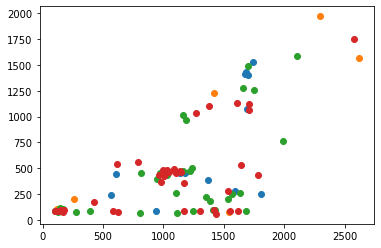

In [19]:
for i in range(len(x)):
    plt.plot((x[i]),(y[i]),'o')

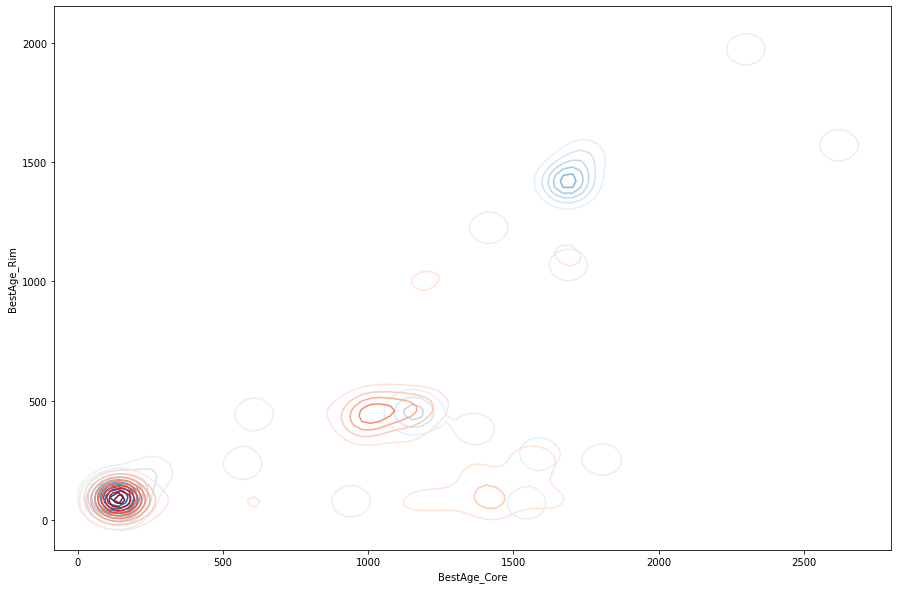

In [20]:
#Prep the Bivariate KDE you want

df3 = df2.loc[sampleList1]
df4 = df2.loc[sampleList2]
fig, ax1 = plt.subplots(figsize=(15, 10))
ax = sns.kdeplot(df3['BestAge_Core'], df3['BestAge_Rim'], bw=60, cmap='Blues', shade=False, shade_lowest=False, n_levels=10, cbar=False)
ax = sns.kdeplot(df4['BestAge_Core'], df4['BestAge_Rim'], bw=60, cmap='Reds', shade=False, shade_lowest=False, n_levels=10, cbar=False)

#Play with a joint plot if you want, they're pretty cool!
#lol = sns.jointplot(df3['BestAge_Core'], df3['BestAge_Rim'])

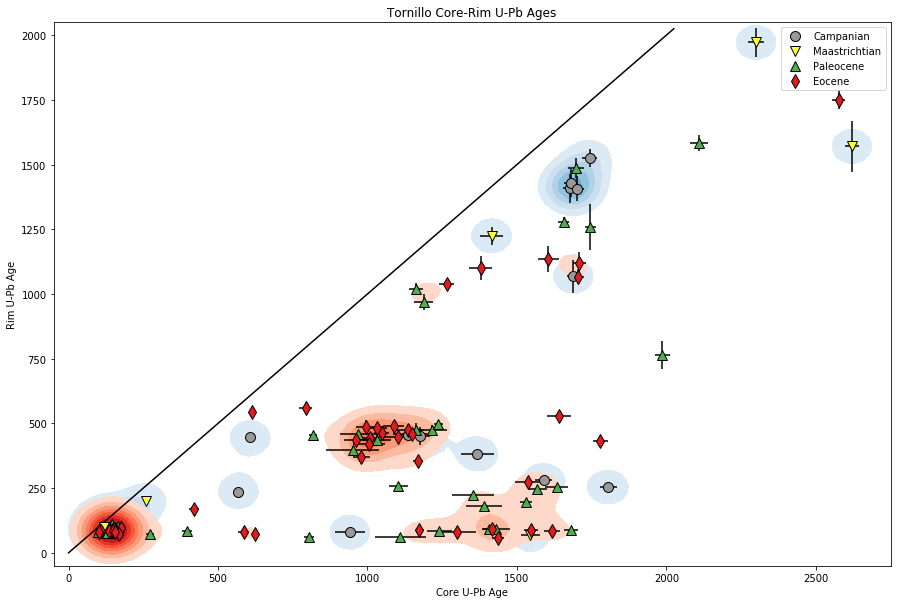

In [21]:
#Plot the Bivariate KDE

#Plot set-up
df3 = df2.loc[sampleList1] #updates df3 for bivariate KDE
df4 = df2.loc[sampleList2]
fig, ax = plt.subplots(figsize=(15, 10)) #makes a fig to plot on; ax = plot; if you do ax1, ax2, etc. you'll have multiple plots

#Plot the bivariate KDE you want
#ax = sns.kdeplot(df3['BestAge_Core'], df3['BestAge_Rim'], bw=60, cmap='Blues_d', shade=False, shade_lowest=False)
ax = sns.kdeplot(df3['BestAge_Core'], df3['BestAge_Rim'], bw=60, cmap='Blues', shade=True, shade_lowest=False, n_levels=10, cbar=False)
ax = sns.kdeplot(df4['BestAge_Core'], df4['BestAge_Rim'], bw=60, cmap='Reds', shade=True, shade_lowest=False, n_levels=10, cbar=False)
#note seaborn only supports gaussian kernels for bivariate kdes

ax.plot((0,2025),(0,2025), color='black')

#Plot the scatterplot
for i in range(len(x)):
    #sampleList = ['Maastrichtian', 'Late Paleocene', 'Early Eocene', 'Mid Eocene', 'Late Eocene', 'Early Oligocene']
    #colors = ['mistyrose', 'mistyrose', 'mistyrose', 'lightskyblue','lightskyblue','lightskyblue','lightskyblue','lightgray']
    colors = plt.cm.Set1_r(np.linspace(0,1,len(sampleList)))
    #colors = ['red']
    markers = ['o','v','^','d','P','p','X']
    labels = ['Campanian', 'Maastrichtian', 'Paleocene', 'Eocene']
    #markers = ['p']
    #labels = ['Early Oligocene']
    ax.errorbar((x[i]), (y[i]), xerr=(X_error[i]), yerr=(Y_error[i]), linestyle="", color='black', capsize=0)
    #ax.plot(x, y, marker='o', markersize=7, markeredgewidth=1, markerfacecolor='White', markeredgecolor='Black', linestyle="")
    #ax.plot((x[i]), (y[i]), marker='o', markersize=7, markeredgewidth=1, markerfacecolor='white', markeredgecolor='Black', linestyle="")
    #ax.scatter((x[i]), (y[i]), marker='o', color=(colors[i]), edgecolor='black')
    ax.plot((x[i]), (y[i]), marker=(markers[i]), markersize=10, color=(colors[i]), markeredgecolor='black', alpha=1, linestyle="", label=(labels[i]))
    ax.set_xlim(-50, 2750)
    ax.set_ylim(-50, 2050)
    
    #Choose the Bivariate KDE plot you want
    
    # Kernel density estimate plot instead of the contourf plot
    #ax.imshow(np.rot90(Z), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
    #benefits of KDE plot is not biased by contour interval
    
    # Contourf plot (instead of the kernel density estimate plot) - can look cleaner
    #cfset = ax.contourf(xx, yy, Z, cmap='Blues')
    # contourf(x values, y values, Z values, number of contour intervals - deleted for automatic determination, color map choice)
    
    # Add contour lines if you wish
    #cset = ax.contour(xx, yy, Z, colors='gray')
    
# Label plot
#ax.clabel(cset, inline=1, fontsize=10)
ax.set_title ("Tornillo Core-Rim U-Pb Ages")
ax.set_xlabel('Core U-Pb Age')
ax.set_ylabel('Rim U-Pb Age')
ax.legend()

#Gets rid of top and right borders if you want
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

#plt.show()

In [23]:
import pathlib

In [33]:
pathlib.Path('Output').mkdir(parents=True, exist_ok=True) # Recursively creates the directory and does not raise an exception if the directory already exists 
fig.savefig('Output/Tornillo_Core_Rim_Jr_KPg.pdf')